In [34]:
import pickle
import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
pp = pprint.PrettyPrinter(indent=4)

In [35]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [36]:
# Grid objects from the grid search
with open('Data/pickles/result_dict', 'rb') as file:
    results = pickle.load(file)
# Contains test data
with open('Data/pickles/preproc_data', 'rb') as file:
    data = pickle.load(file)

y_true = data['y_test'].tolist()

In [37]:
# Metrics being used
from sklearn.metrics import accuracy_score, \
    confusion_matrix, \
    roc_curve

In [38]:
# Plot generating functions to not rewrite code

def plot_confusion(y_pred, y_true):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'],
                annot_kws={"size": 20}
                )
    plt.show()

def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(value[0], value[1])
        sns.lineplot(x=fpr, y=tpr, label=key)

    ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')

# Decision Tree

CV score: 0.6783892617449665
max_depth: 7
max_leaf_nodes: None
min_samples_leaf: 7

Accuracy: 0.6880334997584152


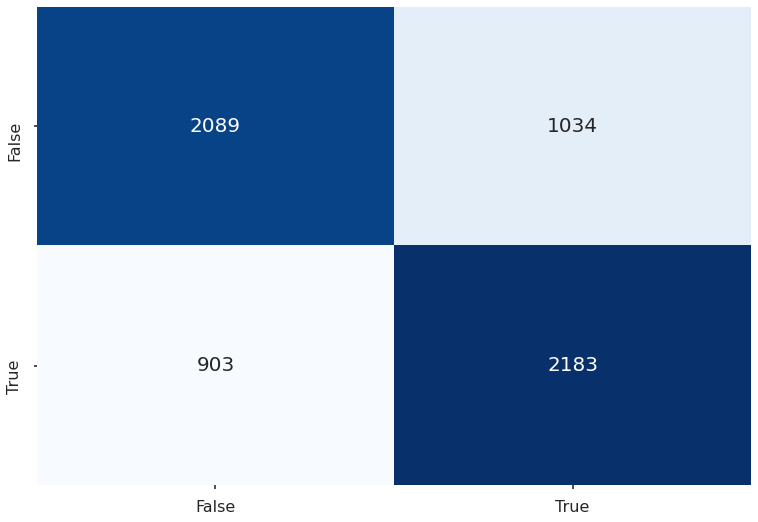

In [39]:
dec_tree = results['dec_tree'].best_estimator_
print(f'CV score: {results["dec_tree"].best_score_}')
for key, value in results["dec_tree"].best_params_.items():
    print(f'{key}: {value}')

y_pred = dec_tree.predict(data['x_test'])
y_pred_prob = dec_tree.predict_proba(data['x_test'])[:,1]
dec = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

* 68% is not that good, at least better than just completely random

# Logistic Regression

CV score: 0.6332885906040269
C: 0.001
fit_intercept: True
n_jobs: -1
penalty: l2

Accuracy: 0.6363343533580287


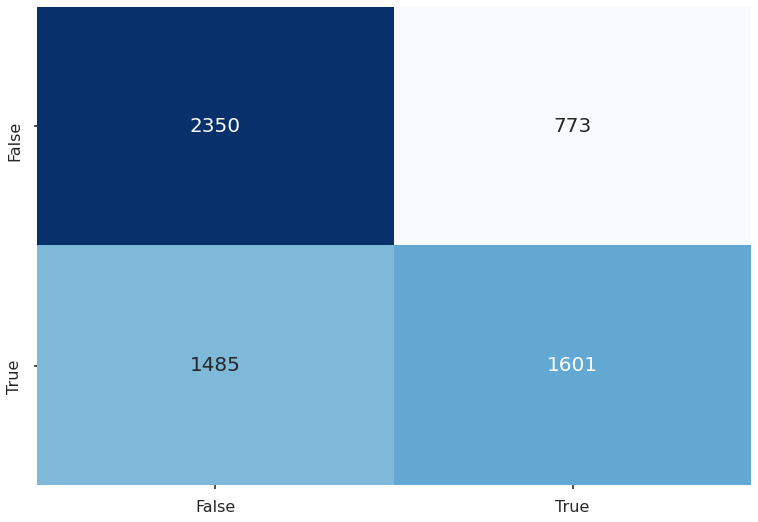

In [40]:
log_reg = results['log_reg'].best_estimator_
print(f'CV score: {results["log_reg"].best_score_}')
for key, value in results["log_reg"].best_params_.items():
    print(f'{key}: {value}')

y_pred = log_reg.predict(data['x_test'])
y_pred_prob = log_reg.predict_proba(data['x_test'])[:,1]
log = [y_true, y_pred_prob]
plot_confusion(y_pred, y_true)

* Worse than decision tree
* Has trouble differentiating between fraudulent or not

# Random Forest

CV score: 0.6837583892617449
bootstrap: True
max_depth: 5
max_features: sqrt
min_samples_leaf: 2
min_samples_split: 5
n_estimators: 100
oob_score: True

Accuracy: 0.6896440650668385


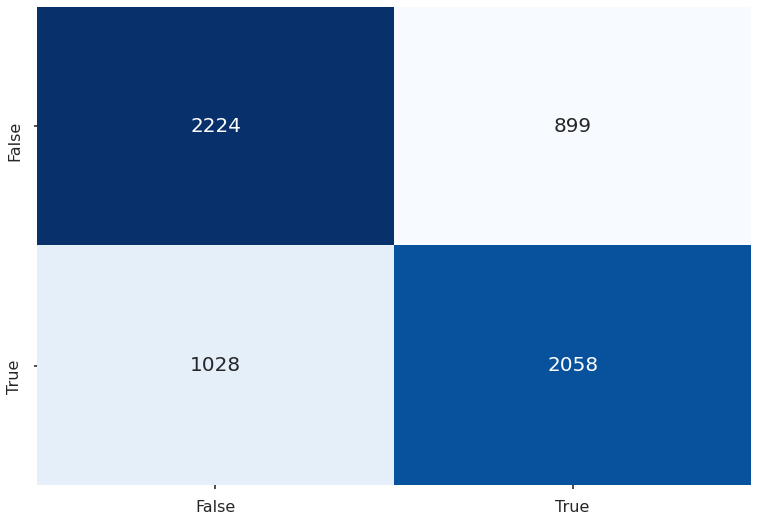

In [41]:
rf = results['rf'].best_estimator_
print(f'CV score: {results["rf"].best_score_}')
for key, value in results["rf"].best_params_.items():
    print(f'{key}: {value}')

y_pred = rf.predict(data['x_test'])
y_pred_prob = rf.predict_proba(data['x_test'])[:,1]
rand_f = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

* Interesting that the decision tree has a tendency to predict many false negative and Random Forest has the same tendency but with false positives
* Random Forest is the best performing model only slightly so far

# SVM

Best CV score: 0.53648322147651
C: 100
degree: 1
gamma: auto
kernel: rbf

Accuracy: 0.5432436785311644


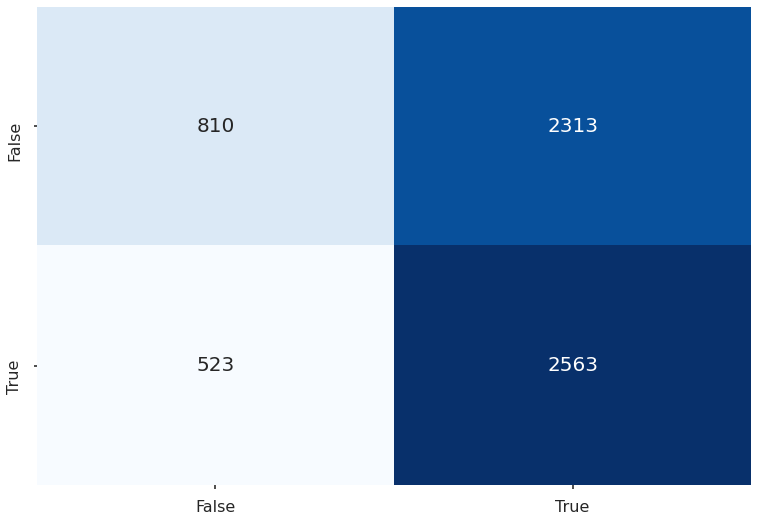

In [42]:
svm = results['svm'].best_estimator_
print(f'Best CV score: {results["svm"].best_score_}')
for key, value in results["svm"].best_params_.items():
    print(f'{key}: {value}')

y_pred = svm.predict(data['x_test'])
y_pred_prob = svm.predict_proba(data['x_test'])[:,1]
svc = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

* Terrible!
* It's pretty much random

# XGBoost

Best CV score: 0.700241610738255
learning_rate: 0.1
max_depth: 5
n_estimators: 125
n_jobs: -1
reg_alpha: 0.5
reg_lambda: 0.5

Accuracy: 0.7167015622483491


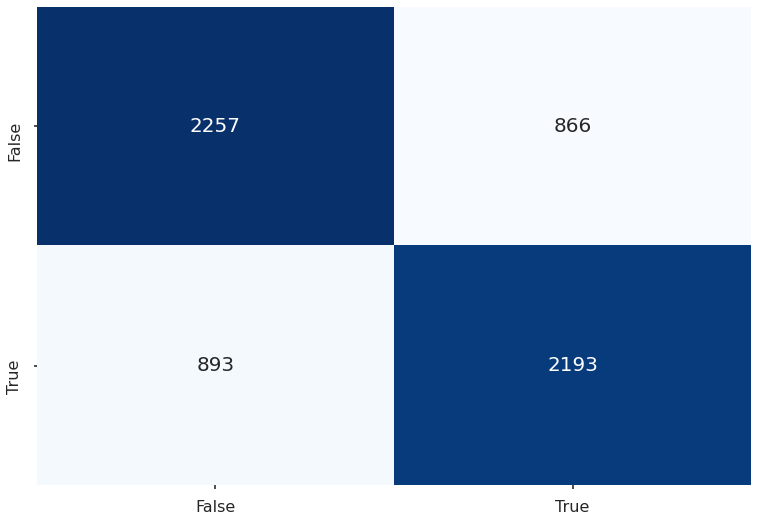

In [43]:
xgboost = results['xgboost'].best_estimator_
print(f'Best CV score: {results["xgboost"].best_score_}')
for key, value in results["xgboost"].best_params_.items():
    print(f'{key}: {value}')

y_pred = xgboost.predict(data['x_test'])
y_pred_prob = xgboost.predict_proba(data['x_test'])[:,1]
xgb = [y_true, y_pred_prob]
plot_confusion(y_pred, data['y_test'])

* Pretty solid results!
* Best performing model

# ROC

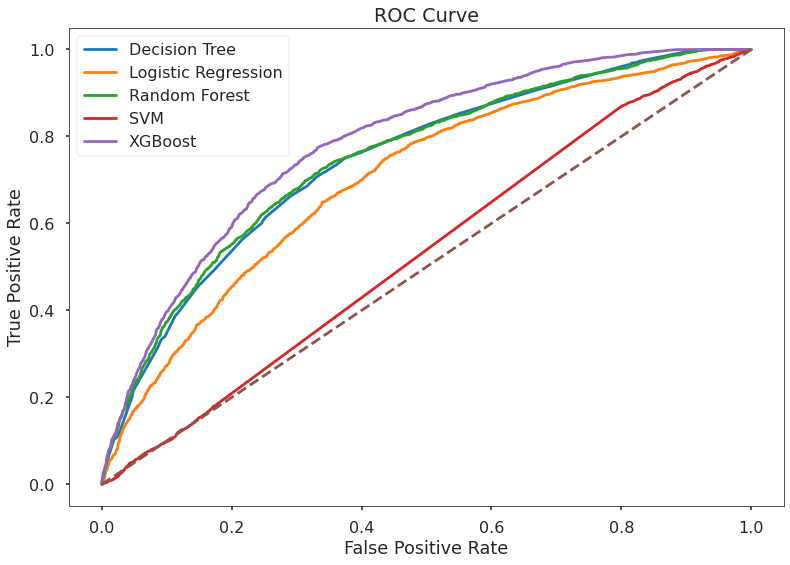

In [44]:
model_results = {
    'Decision Tree': dec,
    'Logistic Regression': log,
    'Random Forest': rand_f,
    'SVM': svc,
    'XGBoost': xgb
}
plot_roc(model_results)

# Conclusion
* XGBoost performs the best of the 5 models
* Interested in seeing accuracy of the models with more data since under-sampling removed a large portion of the data
* None of the models can reliably be used to predict fraudulent transactions
* These results were expected due to the nature of fraudulence detection since usually there are very few fraudulent transactions in comparison to legitimate transactions
* The test scores and validation scores are both very similar, so it does not seem like there is any under-fitting or over-fitting